In [1]:
import numpy as np
import pandas as pd


In [2]:
salaries = [32, 35, 37, 40, 42, 45, 48, 50, 52, 55, 90, 95, 100, 110, 200]

In [3]:
df = pd.DataFrame(salaries,columns=["salary"])
df

,salary
0,32
1,35
2,37
3,40
4,42
5,45
6,48
7,50
8,52
9,55


In [4]:
df.describe()

,salary
count,15.000000
mean,68.733333
std,44.642175
min,32.000000
25%,41.000000
50%,50.000000
75%,92.500000
max,200.000000


## Checking outLiers

### 1 Checking outliers with help of Distplot


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'The BOX Plot')

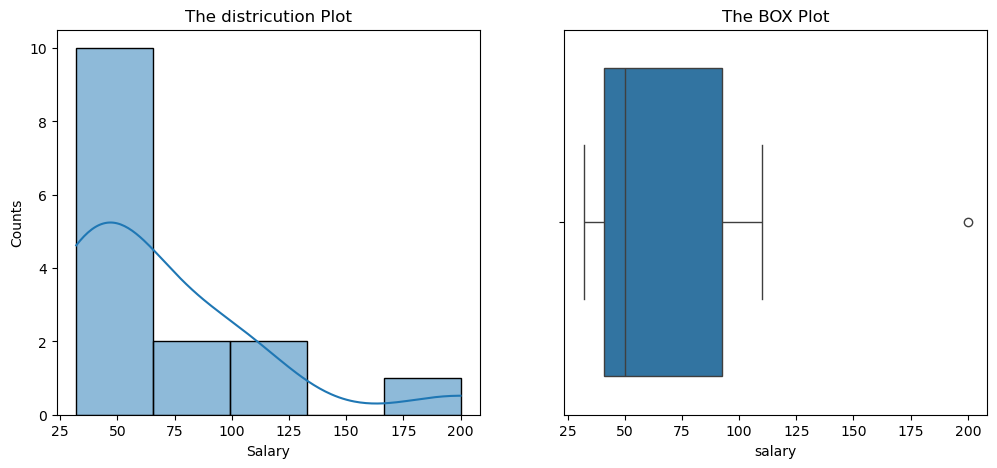

In [8]:
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
sns.histplot(df["salary"], kde =  True)
plt.title("The districution Plot")
plt.xlabel("Salary")
plt.ylabel("Counts")

plt.subplot(1,2,2)
sns.boxplot(data = df, x= "salary")
plt.title("The BOX Plot")



## Dropping The outliers 

In [10]:
df.shape

(15, 1)

In [11]:
# Fro dropping the outliers we will have todermine the Quartiles in the Box plot for the given dataset
# Determine Q1,Q3 and IQR
# Detrmine the upperfence and Lower fence 
# Drop the values greter than uppper fence and Lower Than the Lower fence 
Q1 = df["salary"].quantile(0.25)
Q3 = df["salary"].quantile(0.75)
# InterQuartile range 
IQR = Q3-Q1
IQR

51.5

In [12]:
# Detrmine the Upper Fence 
upper_fence = Q3 + 1.5*IQR
lower_fence = Q1 - 1.5*IQR
upper_fence
# lower_fence

169.75

In [13]:
df_filtered = df[(df.salary >= lower_fence) & (df.salary <= upper_fence)]
df_filtered.shape

(14, 1)

Text(0.5, 1.0, 'The BOX Plot')

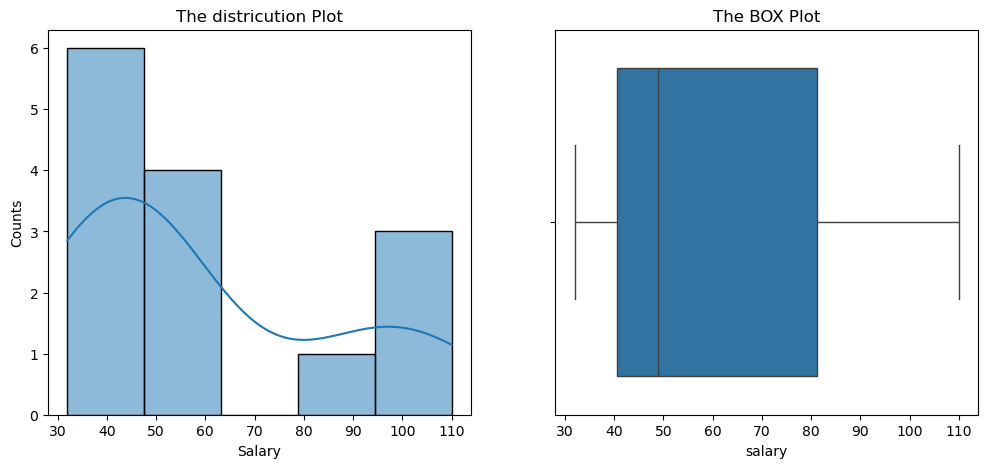

In [14]:
# Plotting for the df_filtered 
plt.figure(figsize= (12,5))
plt.subplot(1,2,1)
sns.histplot(df_filtered["salary"], kde =  True)
plt.title("The districution Plot")
plt.xlabel("Salary")
plt.ylabel("Counts")

plt.subplot(1,2,2)
sns.boxplot(data = df_filtered, x= "salary")
plt.title("The BOX Plot")


## Imputation outliers with Mean and Meadian 


In [16]:
df['salary'].mean()

68.73333333333333

In [17]:
df

,salary
0,32
1,35
2,37
3,40
4,42
5,45
6,48
7,50
8,52
9,55


In [18]:
df["salary_imputed_median"] = np.where((df["salary"] <= lower_fence) | (df["salary"] >= upper_fence), df["salary"].median(), df["salary"])

In [36]:
df["salary_imputed_mean"] = np.where((df["salary"] <= lower_fence) | (df["salary"] >= upper_fence), df["salary"].mean(), df["salary"])

In [38]:
df

,salary,salary_imputed_median,salary_imputed_mean
0,32,32.0,32.000000
1,35,35.0,35.000000
2,37,37.0,37.000000
3,40,40.0,40.000000
4,42,42.0,42.000000
5,45,45.0,45.000000
6,48,48.0,48.000000
7,50,50.0,50.000000
8,52,52.0,52.000000
9,55,55.0,55.000000


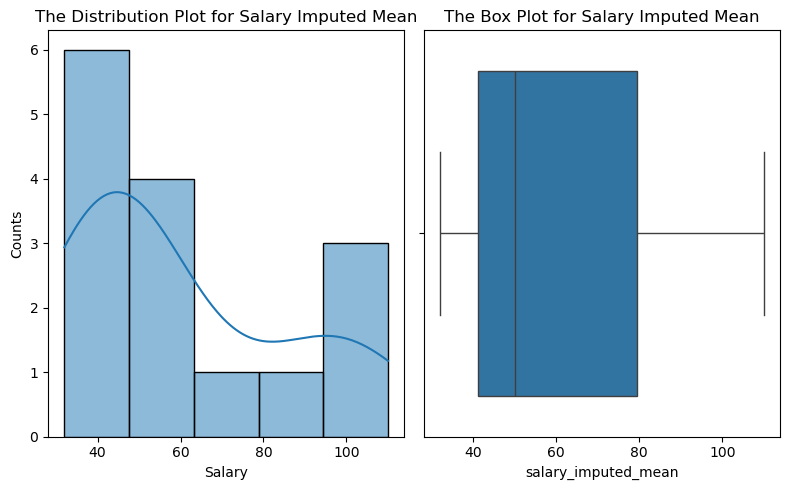

In [46]:
# Plotting for the salary_imputed_mean
plt.figure(figsize=(8, 5))

# First subplot: Histogram with KDE for salary_imputed_mean
plt.subplot(1, 2, 1)
sns.histplot(df["salary_imputed_mean"], kde=True)
plt.title("The Distribution Plot for Salary Imputed Mean")
plt.xlabel("Salary")
plt.ylabel("Counts")

# Second subplot: Boxplot for salary_imputed_mean
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="salary_imputed_mean")  # Use the full df since salary_imputed_mean is in df
plt.title("The Box Plot for Salary Imputed Mean")

# Display the plots
plt.tight_layout()
plt.show()

## Capping Method to Handle the Outliers
### Replacing with the nearest value which is not an outlier

In [55]:
# Determine the Lower Cap and Upper Cap 
lower_cap = df["salary"].quantile(0.05) # Lower Cap as 5th percentile 
upper_cap = df["salary"].quantile(0.95) # Upper cap as 95th percentile 

In [63]:
# Replacing the outliers with nearest caps
df["Salary_capped"] = np.where(df["salary"] < lower_cap, lower_cap, 
                               np.where(df["salary"] > upper_cap, upper_cap, df["salary"]))

In [65]:
df

,salary,salary_imputed_median,salary_imputed_mean,Salary_capped
0,32,32.0,32.000000,34.1
1,35,35.0,35.000000,35.0
2,37,37.0,37.000000,37.0
3,40,40.0,40.000000,40.0
4,42,42.0,42.000000,42.0
5,45,45.0,45.000000,45.0
6,48,48.0,48.000000,48.0
7,50,50.0,50.000000,50.0
8,52,52.0,52.000000,52.0
9,55,55.0,55.000000,55.0


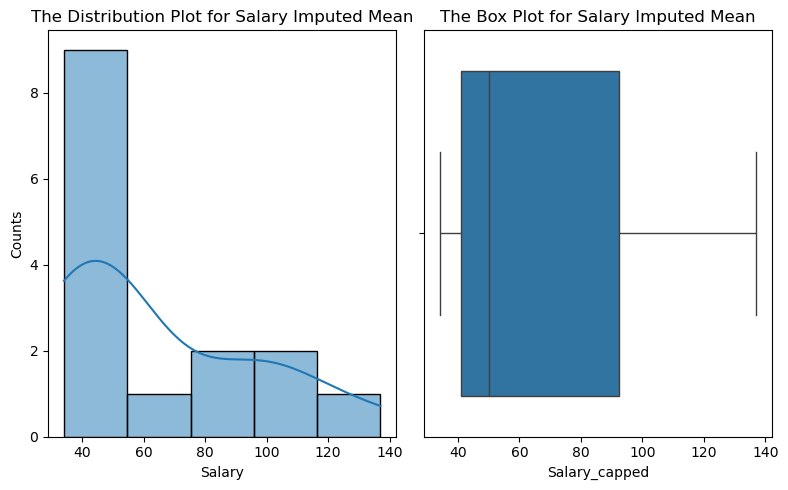

In [67]:
# Plotting for the Salary Capped values
plt.figure(figsize=(8, 5))

# First subplot: Histogram with KDE for salary_imputed_mean
plt.subplot(1, 2, 1)
sns.histplot(df["Salary_capped"], kde=True)
plt.title("The Distribution Plot for Salary Imputed Mean")
plt.xlabel("Salary")
plt.ylabel("Counts")

# Second subplot: Boxplot for salary_imputed_mean
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="Salary_capped")  # Use the full df since salary_imputed_mean is in df
plt.title("The Box Plot for Salary Imputed Mean")

# Display the plots
plt.tight_layout()
plt.show()